In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
data1 = pd.read_csv('vacc_data_IND.csv')
data1

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,India,IND,15-01-2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
1,India,IND,16-01-2021,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
2,India,IND,17-01-2021,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
3,India,IND,18-01-2021,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
4,India,IND,19-01-2021,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,India,IND,23-07-2021,427882261.0,336819816.0,91062445.0,4465231.0,4026626.0,31.01,24.41,6.60,2918.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
190,India,IND,24-07-2021,433150864.0,340387695.0,92763169.0,5268603.0,4031307.0,31.39,24.67,6.72,2921.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
191,India,IND,25-07-2021,435196001.0,341802707.0,93393294.0,2045137.0,3829563.0,31.54,24.77,6.77,2775.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
192,India,IND,26-07-2021,441912395.0,346516149.0,95396246.0,6716394.0,4295142.0,32.02,25.11,6.91,3112.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/


In [3]:
data1.drop(0, inplace = True)
data1.drop(['total_vaccinations', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'iso_code', 'country'], axis = 1, inplace = True)

In [4]:
data1.head()

,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,16-01-2021,191181.0,NaN,191181.0,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
2,17-01-2021,224301.0,NaN,33120.0,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
3,18-01-2021,454049.0,NaN,229748.0,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
4,19-01-2021,674835.0,NaN,220786.0,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
5,20-01-2021,806484.0,NaN,131649.0,0.06,NaN,117.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/


In [5]:
data1.describe()

,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.860000e+02,1.580000e+02,1.800000e+02,186.000000,158.000000,193.000000
mean,1.204960e+08,3.279747e+07,2.332406e+06,8.731667,2.376582,1624.585492
std,1.065211e+08,2.645265e+07,1.910648e+06,7.719188,1.916775,1106.585125
min,1.911810e+05,7.668000e+03,5.671000e+03,0.010000,0.000000,81.000000
25%,1.509680e+07,8.548015e+06,5.846192e+05,1.092500,0.622500,594.000000
50%,1.106663e+08,3.221994e+07,2.189748e+06,8.020000,2.335000,1569.000000
75%,1.905078e+08,4.778081e+07,3.285825e+06,13.807500,3.462500,2369.000000
max,3.493241e+08,9.683260e+07,1.092046e+07,25.310000,7.020000,4548.000000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1 to 193
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 193 non-null    object 
 1   people_vaccinated                    186 non-null    float64
 2   people_fully_vaccinated              158 non-null    float64
 3   daily_vaccinations_raw               180 non-null    float64
 4   people_vaccinated_per_hundred        186 non-null    float64
 5   people_fully_vaccinated_per_hundred  158 non-null    float64
 6   daily_vaccinations_per_million       193 non-null    float64
 7   vaccines                             193 non-null    object 
 8   source_name                          193 non-null    object 
 9   source_website                       193 non-null    object 
dtypes: float64(6), object(4)
memory usage: 16.6+ KB


In [7]:
data1.isnull().sum()

date                                    0
people_vaccinated                       7
people_fully_vaccinated                35
daily_vaccinations_raw                 13
people_vaccinated_per_hundred           7
people_fully_vaccinated_per_hundred    35
daily_vaccinations_per_million          0
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

In [8]:
data_vacc = data1[data1['daily_vaccinations_raw'].notnull()]
data_vacc.head()

,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,16-01-2021,191181.0,NaN,191181.0,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
2,17-01-2021,224301.0,NaN,33120.0,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
3,18-01-2021,454049.0,NaN,229748.0,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
4,19-01-2021,674835.0,NaN,220786.0,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
5,20-01-2021,806484.0,NaN,131649.0,0.06,NaN,117.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/


In [126]:
data_vacc['date'] = pd.to_datetime(data_vacc['date'])

In [129]:
data_vacc['date'][1]

Timestamp('2021-01-16 00:00:00')

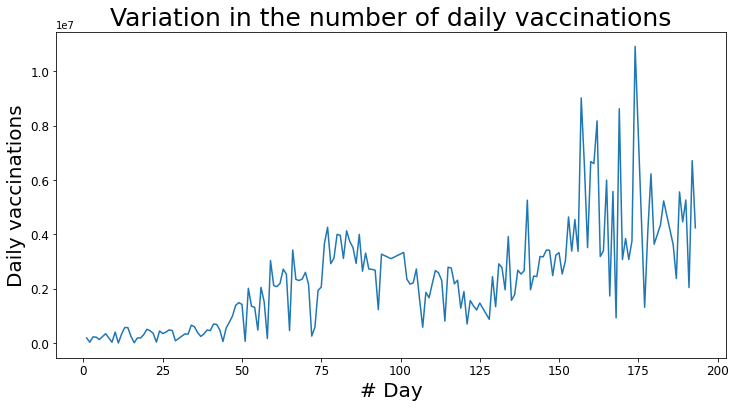

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(list(data_vacc.index), data_vacc['daily_vaccinations_raw'])
plt.title('Variation in the number of daily vaccinations', size = 25)
plt.xlabel('# Day', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Daily vaccinations', size = 20)
plt.yticks(fontsize = 12)
plt.show()

In [10]:
from scipy import stats

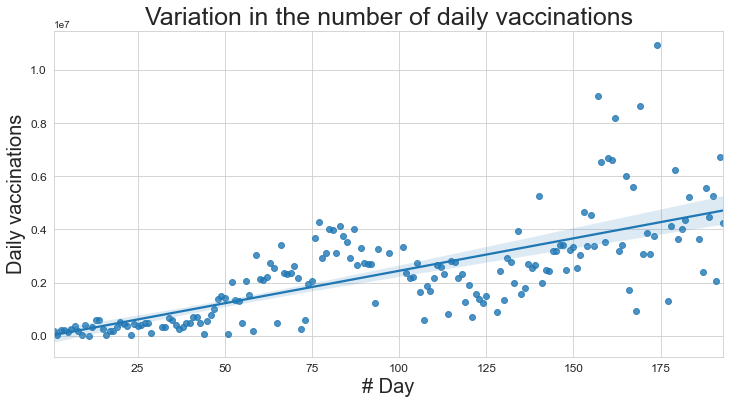

In [11]:
plt.figure(figsize = (12, 6))
sns.set_style('whitegrid')
sns.regplot(list(data_vacc.index), data_vacc['daily_vaccinations_raw'])
plt.title('Variation in the number of daily vaccinations', size = 25)
plt.xlabel('# Day', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Daily vaccinations', size = 20)
plt.yticks(fontsize = 12)
plt.show()

In [12]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(list(data_vacc.index), data_vacc['daily_vaccinations_raw'])

In [13]:
display(slope1, intercept1, std_err1)

24426.12037823853

-1509.5632518026978

1788.3936767945331

In [14]:
full_vax_data = data1[data1['people_fully_vaccinated'].notnull()]
full_vax_data

,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
29,13-02-2021,8044786.0,7668.0,84807.0,0.58,0.00,236.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
31,15-02-2021,8418653.0,98118.0,NaN,0.61,0.01,234.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
32,16-02-2021,8641002.0,216339.0,340570.0,0.63,0.02,232.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
33,17-02-2021,8844641.0,342116.0,329416.0,0.64,0.02,225.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
34,18-02-2021,9381591.0,464932.0,659766.0,0.68,0.03,242.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
...,...,...,...,...,...,...,...,...,...,...
189,23-07-2021,336819816.0,91062445.0,4465231.0,24.41,6.60,2918.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
190,24-07-2021,340387695.0,92763169.0,5268603.0,24.67,6.72,2921.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
191,25-07-2021,341802707.0,93393294.0,2045137.0,24.77,6.77,2775.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
192,26-07-2021,346516149.0,95396246.0,6716394.0,25.11,6.91,3112.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/


In [15]:
full_vax_data = full_vax_data.reset_index()
full_vax_data

,index,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,29,13-02-2021,8044786.0,7668.0,84807.0,0.58,0.00,236.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
1,31,15-02-2021,8418653.0,98118.0,NaN,0.61,0.01,234.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
2,32,16-02-2021,8641002.0,216339.0,340570.0,0.63,0.02,232.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
3,33,17-02-2021,8844641.0,342116.0,329416.0,0.64,0.02,225.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
4,34,18-02-2021,9381591.0,464932.0,659766.0,0.68,0.03,242.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
...,...,...,...,...,...,...,...,...,...,...,...
153,189,23-07-2021,336819816.0,91062445.0,4465231.0,24.41,6.60,2918.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
154,190,24-07-2021,340387695.0,92763169.0,5268603.0,24.67,6.72,2921.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
155,191,25-07-2021,341802707.0,93393294.0,2045137.0,24.77,6.77,2775.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
156,192,26-07-2021,346516149.0,95396246.0,6716394.0,25.11,6.91,3112.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/


In [16]:
full_vax_data = full_vax_data.drop('index', axis = 1)
full_vax_data

,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,13-02-2021,8044786.0,7668.0,84807.0,0.58,0.00,236.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
1,15-02-2021,8418653.0,98118.0,NaN,0.61,0.01,234.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
2,16-02-2021,8641002.0,216339.0,340570.0,0.63,0.02,232.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
3,17-02-2021,8844641.0,342116.0,329416.0,0.64,0.02,225.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
4,18-02-2021,9381591.0,464932.0,659766.0,0.68,0.03,242.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
...,...,...,...,...,...,...,...,...,...,...
153,23-07-2021,336819816.0,91062445.0,4465231.0,24.41,6.60,2918.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
154,24-07-2021,340387695.0,92763169.0,5268603.0,24.67,6.72,2921.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
155,25-07-2021,341802707.0,93393294.0,2045137.0,24.77,6.77,2775.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
156,26-07-2021,346516149.0,95396246.0,6716394.0,25.11,6.91,3112.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/


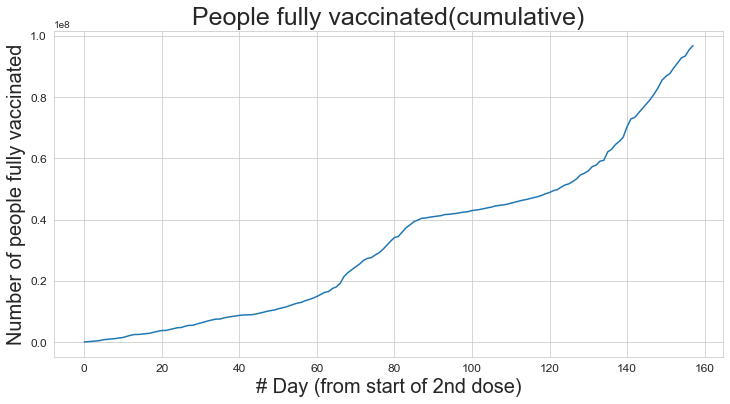

In [17]:
plt.figure(figsize = (12, 6))
plt.plot(list(full_vax_data.index), full_vax_data['people_fully_vaccinated'])
plt.title('People fully vaccinated(cumulative)', size = 25)
plt.xlabel('# Day (from start of 2nd dose)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Number of people fully vaccinated', size = 20)
plt.yticks(fontsize = 12)
plt.show()

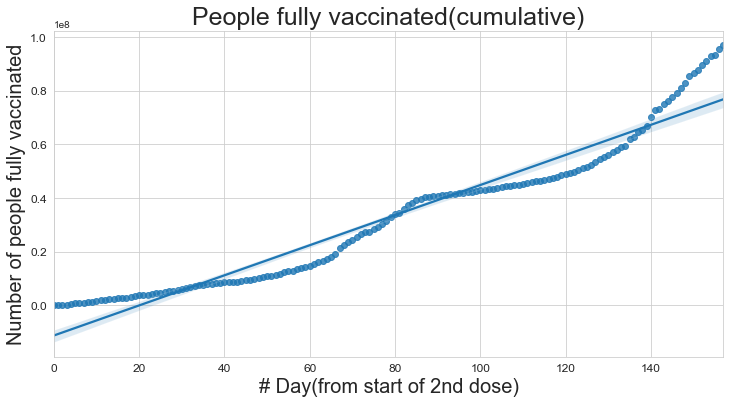

In [18]:
plt.figure(figsize = (12, 6))
sns.set_style('whitegrid')
sns.regplot(list(full_vax_data.index), full_vax_data['people_fully_vaccinated'])
plt.title('People fully vaccinated(cumulative)', size = 25)
plt.xlabel('# Day(from start of 2nd dose)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Number of people fully vaccinated', size = 20)
plt.yticks(fontsize = 12)
plt.show()

In [19]:
full_vax_data['people_fully_vaccinated'].max()

96832598.0

In [20]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(list(full_vax_data.index), full_vax_data['people_fully_vaccinated'])

In [21]:
# after day 30 odd, gives a better fit
display(slope2, intercept2, std_err2)

560533.4968076805

-11204408.651301652

11336.234585398086

In [119]:
pop = 136.64 * (10**7)
days = (pop - intercept2) / slope2

In [130]:
est_date = data_vacc['date'][1] + datetime.timedelta(round(days))
est_date

Timestamp('2027-10-10 00:00:00')

In [22]:
data2 = pd.read_csv('new_covid_data_IND.csv')
data2.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,IND,Asia,India,30-01-2020,1,1,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
1,IND,Asia,India,31-01-2020,1,0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
2,IND,Asia,India,01-02-2020,1,0,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
3,IND,Asia,India,02-02-2020,2,1,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
4,IND,Asia,India,03-02-2020,3,1,NaN,NaN,NaN,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [23]:
len(data2)

547

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               547 non-null    object 
 1   continent                              547 non-null    object 
 2   location                               547 non-null    object 
 3   date                                   547 non-null    object 
 4   total_cases                            547 non-null    int64  
 5   new_cases                              547 non-null    int64  
 6   new_cases_smoothed                     542 non-null    float64
 7   total_deaths                           506 non-null    float64
 8   new_deaths                             506 non-null    float64
 9   new_deaths_smoothed                    542 non-null    float64
 10  total_cases_per_million                547 non-null    float64
 11  new_ca

In [25]:
data2.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,5.470000e+02,547.000000,542.000000,506.000000,506.000000,542.000000,547.000000,547.000000,542.000000,506.00000,...,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,5.470000e+02,0.0
mean,9.268220e+06,57719.093236,58013.239598,134914.031621,836.397233,777.614934,6716.080049,41.825294,42.038454,97.76347,...,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,NaN
std,9.754116e+06,84097.878009,83876.715758,120469.177305,1074.445481,1020.932998,7068.177422,60.940299,60.780037,87.29625,...,1.244588e-13,9.672226e-13,6.045142e-14,1.422386e-14,2.062460e-13,5.049471e-13,2.222478e-15,3.840443e-13,1.777983e-15,NaN
min,1.000000e+00,-1858.000000,0.000000,1.000000,-39.000000,0.000000,0.001000,-1.346000,0.000000,0.00100,...,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,NaN
25%,3.377575e+05,9969.500000,11199.678750,25086.000000,150.250000,111.500250,244.751000,7.224500,8.115500,18.17850,...,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,NaN
50%,8.088851e+06,32981.000000,34360.214500,131870.000000,484.000000,486.286000,5861.468000,23.899000,24.898500,95.55750,...,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,NaN
75%,1.139758e+07,63042.500000,64070.428750,160884.750000,970.000000,945.321250,8259.093000,45.683000,46.427750,116.58250,...,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,NaN
max,3.157234e+07,414188.000000,391232.000000,423217.000000,7374.000000,4190.000000,22878.437000,300.135000,283.501000,306.67800,...,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01,6.450000e-01,NaN


In [26]:
data2.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              41
new_deaths                                41
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  41
new_deaths_per_million                    41
new_deaths_smoothed_per_million            5
reproduction_rate                         46
icu_patients                             547
icu_patients_per_million                 547
hosp_patients                            547
hosp_patients_per_million                547
weekly_icu_admissions                    547
weekly_icu

In [27]:
data2.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [28]:
data2.drop(['iso_code', 'continent', 'location'], axis = 1, inplace = True)
data2.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,30-01-2020,1,1,NaN,NaN,NaN,NaN,0.001,0.001,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
1,31-01-2020,1,0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
2,01-02-2020,1,0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
3,02-02-2020,2,1,NaN,NaN,NaN,NaN,0.001,0.001,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
4,03-02-2020,3,1,NaN,NaN,NaN,NaN,0.002,0.001,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [29]:
data2['date'] = pd.to_datetime(data2['date'])

In [30]:
data2.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,2020-01-30,1,1,NaN,NaN,NaN,NaN,0.001,0.001,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
1,2020-01-31,1,0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
2,2020-01-02,1,0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
3,2020-02-02,2,1,NaN,NaN,NaN,NaN,0.001,0.001,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
4,2020-03-02,3,1,NaN,NaN,NaN,NaN,0.002,0.001,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [31]:
new_data2 = data2[data2['date'] >= '2021-1-16']
new_data2 = new_data2[11:]

In [32]:
len(new_data2)

189

In [33]:
new_data2.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
352,2021-01-16,10557985,15144,15385.857,152274.0,181.0,182.143,7650.689,10.974,11.149,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
353,2021-01-17,10571773,13788,15025.429,152419.0,145.0,179.857,7660.681,9.991,10.888,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
354,2021-01-18,10581823,10050,14663.429,152556.0,137.0,175.571,7667.963,7.283,10.626,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
355,2021-01-19,10595639,13816,14356.000,152718.0,162.0,169.857,7677.975,10.012,10.403,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
356,2021-01-20,10610883,15244,14112.857,152869.0,151.0,163.143,7689.021,11.046,10.227,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [34]:
new_data2.reset_index(inplace = True)
new_data2 = new_data2.drop('index', axis = 1)
new_data2.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,2021-01-16,10557985,15144,15385.857,152274.0,181.0,182.143,7650.689,10.974,11.149,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
1,2021-01-17,10571773,13788,15025.429,152419.0,145.0,179.857,7660.681,9.991,10.888,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
2,2021-01-18,10581823,10050,14663.429,152556.0,137.0,175.571,7667.963,7.283,10.626,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
3,2021-01-19,10595639,13816,14356.000,152718.0,162.0,169.857,7677.975,10.012,10.403,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
4,2021-01-20,10610883,15244,14112.857,152869.0,151.0,163.143,7689.021,11.046,10.227,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN


In [35]:
new_data2 = new_data2[:-2]

In [36]:
new_data2.drop(['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 
'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 
'stringency_index', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 
'female_smokers', 'male_smokers', 'life_expectancy', 'human_development_index', 'excess_mortality'], axis = 1, inplace = True)

In [37]:
new_data2

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,positive_rate,tests_per_case,tests_units,population,population_density,median_age,aged_65_older,aged_70_older,handwashing_facilities,hospital_beds_per_thousand
0,2021-01-16,10557985,15144,15385.857,152274.0,181.0,182.143,7650.689,10.974,11.149,...,0.020,51.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
1,2021-01-17,10571773,13788,15025.429,152419.0,145.0,179.857,7660.681,9.991,10.888,...,0.019,51.8,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
2,2021-01-18,10581823,10050,14663.429,152556.0,137.0,175.571,7667.963,7.283,10.626,...,0.019,52.0,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
3,2021-01-19,10595639,13816,14356.000,152718.0,162.0,169.857,7677.975,10.012,10.403,...,0.020,51.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
4,2021-01-20,10610883,15244,14112.857,152869.0,151.0,163.143,7689.021,11.046,10.227,...,0.019,51.4,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2021-07-23,31293062,0,32593.429,419470.0,0.0,911.286,22676.060,0.000,23.618,...,0.018,56.6,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
183,2021-07-24,31371901,78839,37976.571,420551.0,1081.0,991.714,22733.189,57.130,27.519,...,0.021,47.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
184,2021-07-25,31411262,39361,38147.571,420967.0,416.0,979.857,22761.712,28.522,27.643,...,0.022,46.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
185,2021-07-26,31440951,29689,38089.857,421382.0,415.0,985.714,22783.225,21.514,27.601,...,0.022,45.1,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53


In [38]:
data1.date = pd.to_datetime(data1.date)

In [39]:
data1

,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,2021-01-16,191181.0,NaN,191181.0,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
2,2021-01-17,224301.0,NaN,33120.0,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
3,2021-01-18,454049.0,NaN,229748.0,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
4,2021-01-19,674835.0,NaN,220786.0,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
5,2021-01-20,806484.0,NaN,131649.0,0.06,NaN,117.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
...,...,...,...,...,...,...,...,...,...,...
189,2021-07-23,336819816.0,91062445.0,4465231.0,24.41,6.60,2918.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
190,2021-07-24,340387695.0,92763169.0,5268603.0,24.67,6.72,2921.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
191,2021-07-25,341802707.0,93393294.0,2045137.0,24.77,6.77,2775.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/
192,2021-07-26,346516149.0,95396246.0,6716394.0,25.11,6.91,3112.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/


In [40]:
net_data = pd.merge(data1, new_data2, on = 'date')
net_data

,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,...,positive_rate,tests_per_case,tests_units,population,population_density,median_age,aged_65_older,aged_70_older,handwashing_facilities,hospital_beds_per_thousand
0,2021-01-16,191181.0,NaN,191181.0,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.020,51.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
1,2021-01-17,224301.0,NaN,33120.0,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.019,51.8,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
2,2021-01-18,454049.0,NaN,229748.0,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.019,52.0,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
3,2021-01-19,674835.0,NaN,220786.0,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.020,51.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
4,2021-01-20,806484.0,NaN,131649.0,0.06,NaN,117.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.019,51.4,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2021-07-23,336819816.0,91062445.0,4465231.0,24.41,6.60,2918.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.018,56.6,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
183,2021-07-24,340387695.0,92763169.0,5268603.0,24.67,6.72,2921.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.021,47.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
184,2021-07-25,341802707.0,93393294.0,2045137.0,24.77,6.77,2775.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.022,46.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
185,2021-07-26,346516149.0,95396246.0,6716394.0,25.11,6.91,3112.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.022,45.1,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53


In [41]:
net_data.columns

Index(['date', 'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       '

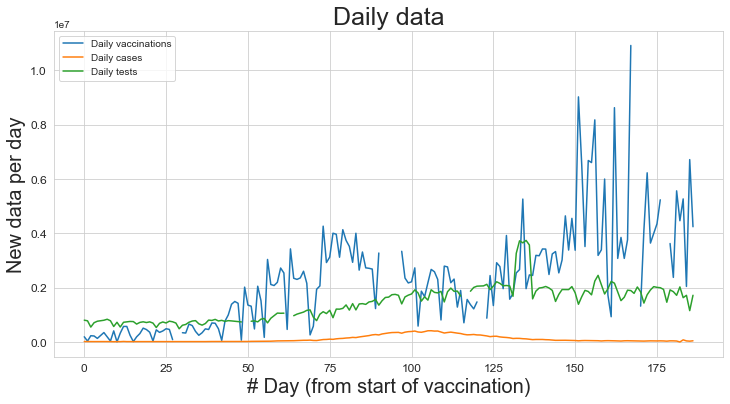

In [42]:
plt.figure(figsize = (12, 6))
plt.plot(list(net_data.index), net_data['daily_vaccinations_raw'], label = 'Daily vaccinations')
plt.plot(list(net_data.index), net_data['new_cases'], label = 'Daily cases')
plt.plot(list(net_data.index), net_data['new_tests'], label = 'Daily tests')
plt.title('Daily data', size = 25)
plt.xlabel('# Day (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('New data per day', size = 20)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

In [43]:
clean_net_data = net_data[(net_data['daily_vaccinations_raw'].notnull()) & (net_data['new_cases'].notnull()) & (net_data['new_tests'].notnull())]

In [44]:
clean_net_data.reset_index(inplace = True)

In [45]:
clean_net_data.drop('index', axis = 1, inplace = True)
clean_net_data

,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,...,positive_rate,tests_per_case,tests_units,population,population_density,median_age,aged_65_older,aged_70_older,handwashing_facilities,hospital_beds_per_thousand
0,2021-01-16,191181.0,NaN,191181.0,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.020,51.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
1,2021-01-17,224301.0,NaN,33120.0,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.019,51.8,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
2,2021-01-18,454049.0,NaN,229748.0,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.019,52.0,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
3,2021-01-19,674835.0,NaN,220786.0,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.020,51.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
4,2021-01-20,806484.0,NaN,131649.0,0.06,NaN,117.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.019,51.4,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2021-07-23,336819816.0,91062445.0,4465231.0,24.41,6.60,2918.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.018,56.6,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
164,2021-07-24,340387695.0,92763169.0,5268603.0,24.67,6.72,2921.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.021,47.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
165,2021-07-25,341802707.0,93393294.0,2045137.0,24.77,6.77,2775.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.022,46.2,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53
166,2021-07-26,346516149.0,95396246.0,6716394.0,25.11,6.91,3112.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,0.022,45.1,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53


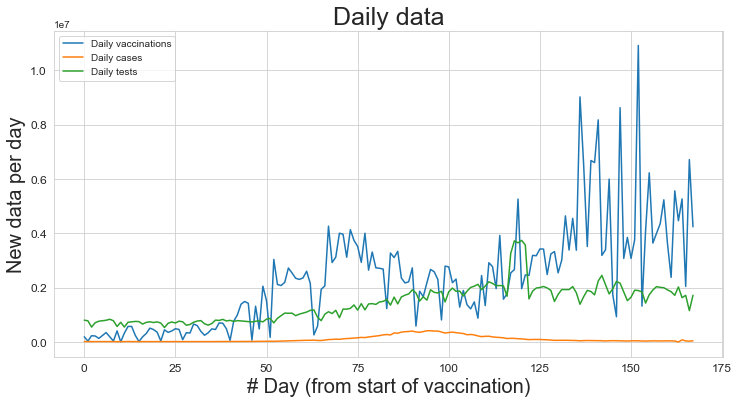

In [46]:
plt.figure(figsize = (12, 6))
plt.plot(list(clean_net_data.index), clean_net_data['daily_vaccinations_raw'], label = 'Daily vaccinations')
plt.plot(list(clean_net_data.index), clean_net_data['new_cases'], label = 'Daily cases')
plt.plot(list(clean_net_data.index), clean_net_data['new_tests'], label = 'Daily tests')
plt.title('Daily data', size = 25)
plt.xlabel('# Day (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('New data per day', size = 20)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

In [47]:
clean_net_data['date']

0     2021-01-16
1     2021-01-17
2     2021-01-18
3     2021-01-19
4     2021-01-20
         ...    
163   2021-07-23
164   2021-07-24
165   2021-07-25
166   2021-07-26
167   2021-07-27
Name: date, Length: 168, dtype: datetime64[ns]

In [48]:
print(list(clean_net_data.index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]


In [49]:
week = [k//7 for k in list(clean_net_data.index)]
print(week)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23]


In [50]:
fortnight = [k//15 for k in list(clean_net_data.index)]
print(fortnight)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11]


In [51]:
clean_net_data['week'] = pd.Series(week)
clean_net_data['fortnight'] = pd.Series(fortnight)

In [52]:
clean_net_data

,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,...,tests_units,population,population_density,median_age,aged_65_older,aged_70_older,handwashing_facilities,hospital_beds_per_thousand,week,fortnight
0,2021-01-16,191181.0,NaN,191181.0,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,0,0
1,2021-01-17,224301.0,NaN,33120.0,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,0,0
2,2021-01-18,454049.0,NaN,229748.0,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,0,0
3,2021-01-19,674835.0,NaN,220786.0,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,0,0
4,2021-01-20,806484.0,NaN,131649.0,0.06,NaN,117.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2021-07-23,336819816.0,91062445.0,4465231.0,24.41,6.60,2918.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,23,10
164,2021-07-24,340387695.0,92763169.0,5268603.0,24.67,6.72,2921.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,23,10
165,2021-07-25,341802707.0,93393294.0,2045137.0,24.77,6.77,2775.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,23,11
166,2021-07-26,346516149.0,95396246.0,6716394.0,25.11,6.91,3112.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,samples tested,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,23,11


In [53]:
clean_net_data['fortnight']

0       0
1       0
2       0
3       0
4       0
       ..
163    10
164    10
165    11
166    11
167    11
Name: fortnight, Length: 168, dtype: int64

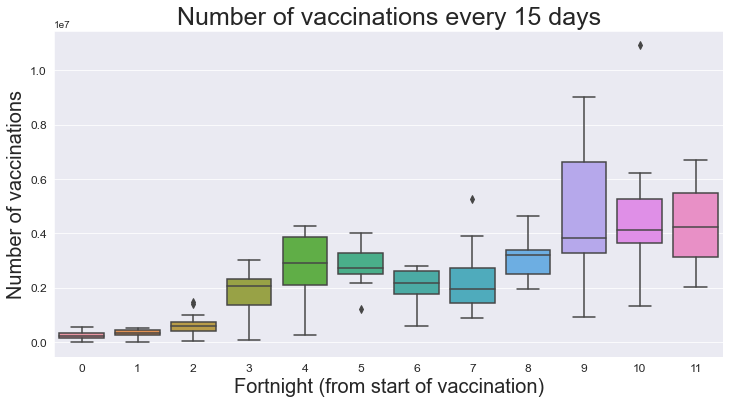

In [54]:
plt.figure(figsize = (12, 6))
sns.set_style('darkgrid')
sns.boxplot(x = 'fortnight', y = 'daily_vaccinations_raw', data = clean_net_data)
plt.title('Number of vaccinations every 15 days', size = 25)
plt.xlabel('Fortnight (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Number of vaccinations', size = 20)
plt.yticks(fontsize = 12)
plt.show()

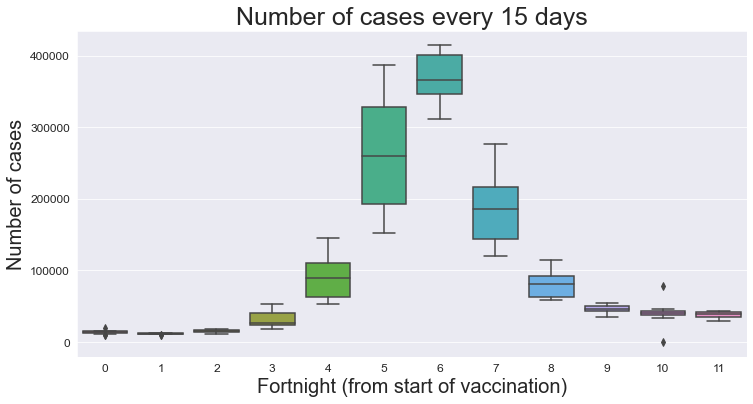

In [55]:
plt.figure(figsize = (12, 6))
sns.set_style('darkgrid')
sns.boxplot(x = 'fortnight', y = 'new_cases', data = clean_net_data)
plt.title('Number of cases every 15 days', size = 25)
plt.xlabel('Fortnight (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Number of cases', size = 20)
plt.yticks(fontsize = 12)
plt.show()

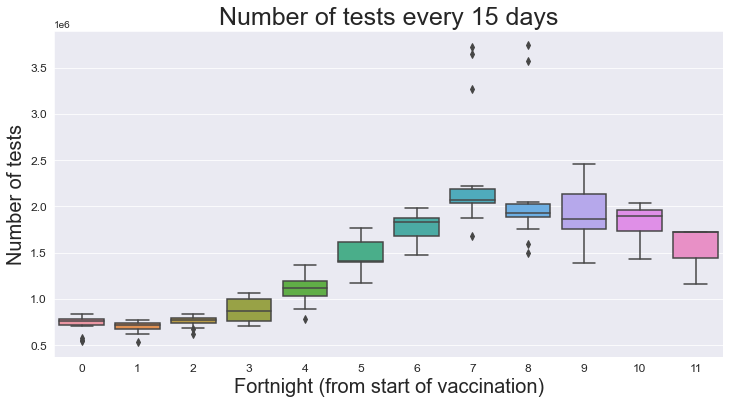

In [56]:
plt.figure(figsize = (12, 6))
sns.set_style('darkgrid')
sns.boxplot(x = 'fortnight', y = 'new_tests', data = clean_net_data)
plt.title('Number of tests every 15 days', size = 25)
plt.xlabel('Fortnight (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Number of tests', size = 20)
plt.yticks(fontsize = 12)
plt.show()

In [57]:
clean_net_data['effectiveness'] = ((0.6 * clean_net_data['daily_vaccinations_raw'] + 0.4 * clean_net_data['new_tests']) / (0.3*clean_net_data['new_cases'] + 0.7*clean_net_data['new_deaths'])) 

In [58]:
clean_net_data.head()

,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,...,population,population_density,median_age,aged_65_older,aged_70_older,handwashing_facilities,hospital_beds_per_thousand,week,fortnight,effectiveness
0,2021-01-16,191181.0,NaN,191181.0,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,0,0,93.352020
1,2021-01-17,224301.0,NaN,33120.0,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,0,0,78.251681
2,2021-01-18,454049.0,NaN,229748.0,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,0,0,114.795075
3,2021-01-19,674835.0,NaN,220786.0,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,0,0,97.784980
4,2021-01-20,806484.0,NaN,131649.0,0.06,NaN,117.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,1380004385,450.419,28.2,5.989,3.414,59.55,0.53,0,0,82.206801


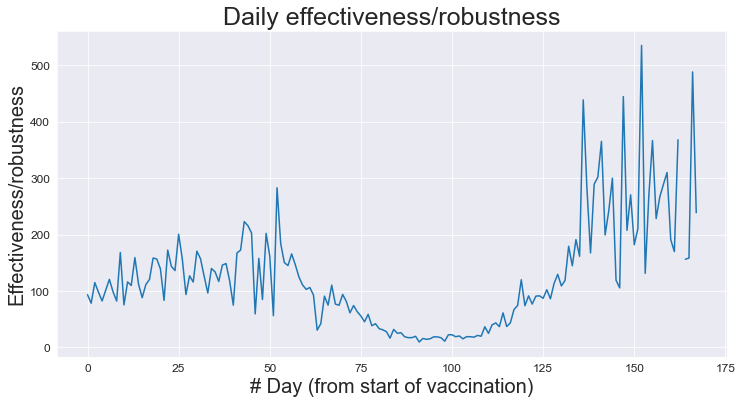

In [59]:
plt.figure(figsize = (12, 6))
plt.plot(list(clean_net_data.index), clean_net_data['effectiveness'])
plt.title('Daily effectiveness/robustness', size = 25)
plt.xlabel('# Day (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Effectiveness/robustness', size = 20)
plt.yticks(fontsize = 12)
plt.show()

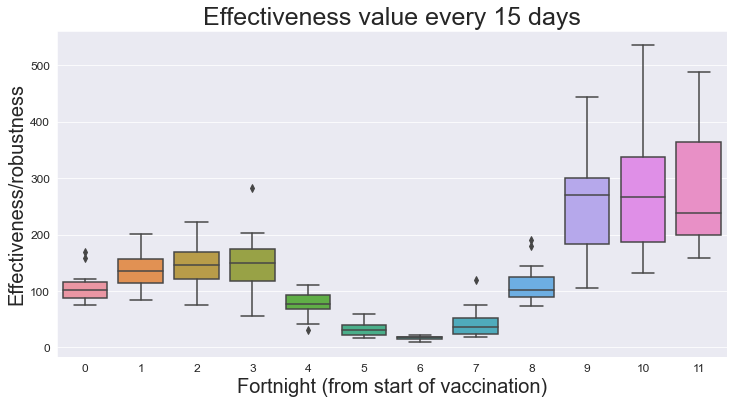

In [60]:
plt.figure(figsize = (12, 6))
sns.set_style('darkgrid')
sns.boxplot(x = 'fortnight', y = 'effectiveness', data = clean_net_data)
plt.title('Effectiveness value every 15 days', size = 25)
plt.xlabel('Fortnight (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Effectiveness/robustness', size = 20)
plt.yticks(fontsize = 12)
plt.show() 

In [61]:
clean_net_data.columns

Index(['date', 'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       '

In [62]:
eff = list(clean_net_data['effectiveness'])

In [63]:
rate_eff = [0]
for i in range(len(eff)-1):
    rate_eff.append(eff[i+1]-eff[i])

In [64]:
display(len(rate_eff))
print(rate_eff)

168

[0, -15.10033912864904, 36.543394122888614, -17.01009581128318, -15.578178825067326, 19.31276330840622, 19.016026384040217, -21.9636672244298, -16.480771852160217, 86.11556864037902, -92.96626491877213, 40.78893781874146, -6.247810395550417, 49.42916242780345, -46.990710450325366, -24.245138369868755, 23.28487902297927, 9.114610100504322, 38.06198508815356, -1.8190091349713953, -17.358204801688572, -55.963349729762015, 89.21172670478843, -28.856805342893665, -7.510816570687837, 64.45288361743133, -43.40307770383592, -63.61807388705516, 33.252899165031906, -11.03750324993355, 54.734198624715546, -13.448708379795335, -30.943885169070228, -29.753175477102047, 43.397581974071045, -5.94724174328644, -17.006309415010335, 29.035159980641268, 2.719332852296077, -30.852794526004246, -42.936843736861576, 92.49512342524284, 5.165340911754157, 50.520857148372926, -7.15964075718972, -12.941318274099842, -143.5241827966078, 98.41181318286692, -72.9528735754942, 117.28184759919945, -40.15710574195108

In [65]:
clean_net_data['rate of effectiveness'] = pd.Series(rate_eff)
clean_net_data.head()

,date,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,...,population_density,median_age,aged_65_older,aged_70_older,handwashing_facilities,hospital_beds_per_thousand,week,fortnight,effectiveness,rate of effectiveness
0,2021-01-16,191181.0,NaN,191181.0,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,450.419,28.2,5.989,3.414,59.55,0.53,0,0,93.352020,0.000000
1,2021-01-17,224301.0,NaN,33120.0,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,450.419,28.2,5.989,3.414,59.55,0.53,0,0,78.251681,-15.100339
2,2021-01-18,454049.0,NaN,229748.0,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,450.419,28.2,5.989,3.414,59.55,0.53,0,0,114.795075,36.543394
3,2021-01-19,674835.0,NaN,220786.0,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,450.419,28.2,5.989,3.414,59.55,0.53,0,0,97.784980,-17.010096
4,2021-01-20,806484.0,NaN,131649.0,0.06,NaN,117.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,...,450.419,28.2,5.989,3.414,59.55,0.53,0,0,82.206801,-15.578179


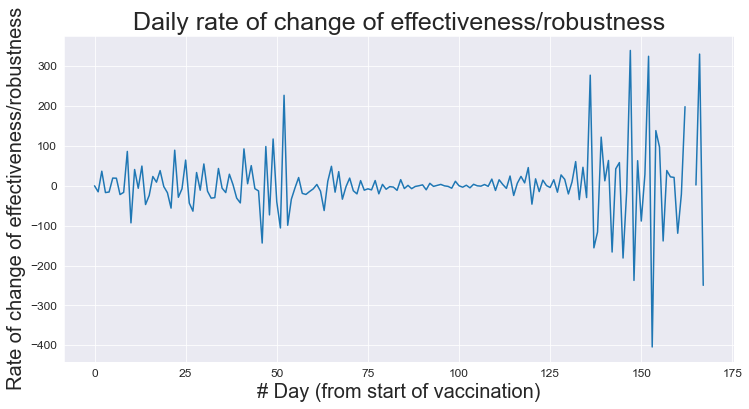

In [66]:
plt.figure(figsize = (12, 6))
plt.plot(list(clean_net_data.index), clean_net_data['rate of effectiveness'])
plt.title('Daily rate of change of effectiveness/robustness', size = 25)
plt.xlabel('# Day (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Rate of change of effectiveness/robustness', size = 20)
plt.yticks(fontsize = 12)
plt.show()

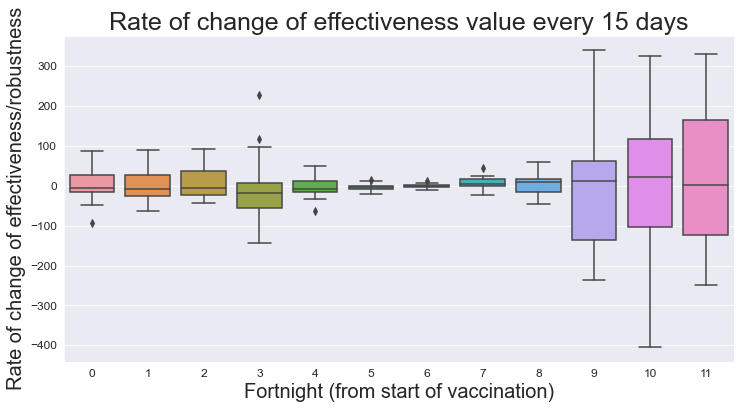

In [67]:
plt.figure(figsize = (12, 6))
sns.set_style('darkgrid')
sns.boxplot(x = 'fortnight', y = 'rate of effectiveness', data = clean_net_data)
plt.title('Rate of change of effectiveness value every 15 days', size = 25)
plt.xlabel('Fortnight (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Rate of change of effectiveness/robustness', size = 20)
plt.yticks(fontsize = 12)
plt.show() 

In [68]:
clean_net_data_weekly = clean_net_data.groupby('week').sum()
clean_net_data_15 = clean_net_data.groupby('fortnight').sum()

In [69]:
clean_net_data_weekly.head()

,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,total_cases,new_cases,new_cases_smoothed,total_deaths,...,population,population_density,median_age,aged_65_older,aged_70_older,handwashing_facilities,hospital_beds_per_thousand,fortnight,effectiveness,rate of effectiveness
week,,,,,,,,,,,,,,,,,,,,,
0,4784976.0,0.0,1390592.0,0.35,0.00,839.0,74183215,96843,101341.857,1069052.0,...,9660030695,3152.933,197.4,41.923,23.898,416.85,3.71,0,688.445712,27.183570
1,16035053.0,0.0,2109435.0,1.16,0.00,1164.0,74843005,93446,94255.714,1076124.0,...,9660030695,3152.933,197.4,41.923,23.898,416.85,3.71,0,809.131970,38.675154
2,32243263.0,0.0,2083982.0,2.33,0.00,1499.0,75514509,84598,86023.999,1082702.0,...,9660030695,3152.933,197.4,41.923,23.898,416.85,3.71,6,886.141979,-19.951589
3,49217488.0,7668.0,2277132.0,3.56,0.00,1738.0,76093452,78577,79838.857,1087489.0,...,9660030695,3152.933,197.4,41.923,23.898,416.85,3.71,7,986.948135,-45.687513
4,66957700.0,4730453.0,2907323.0,4.85,0.33,1835.0,76842237,90724,84569.143,1093400.0,...,9660030695,3152.933,197.4,41.923,23.898,416.85,3.71,12,932.482514,46.201407


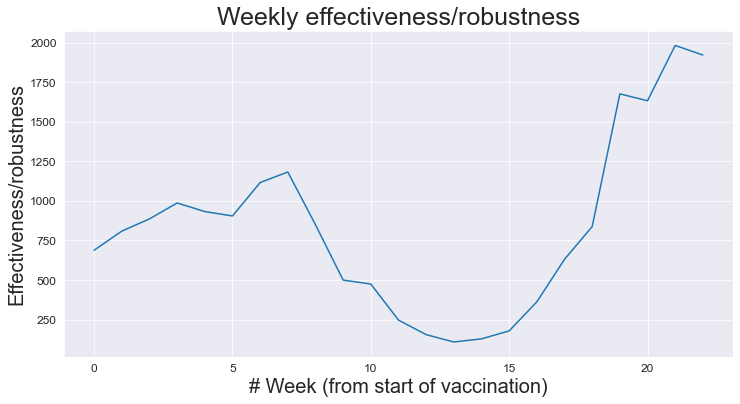

In [70]:
plt.figure(figsize = (12, 6))
plt.plot(list(clean_net_data_weekly.index), clean_net_data_weekly['effectiveness'])
plt.title('Weekly effectiveness/robustness', size = 25)
plt.xlabel('# Week (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Effectiveness/robustness', size = 20)
plt.yticks(fontsize = 12)
plt.show()

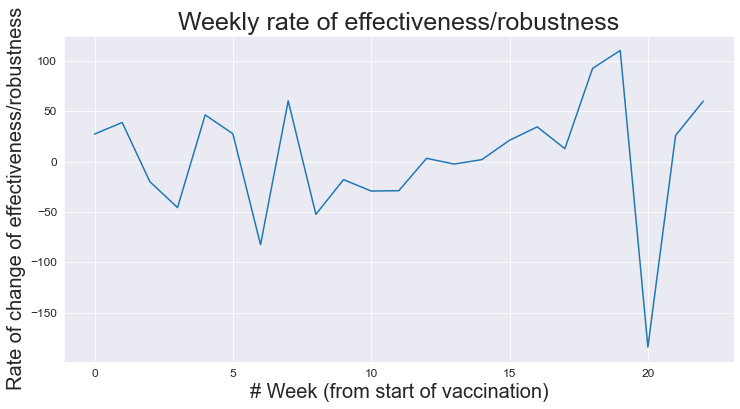

In [71]:
plt.figure(figsize = (12, 6))
plt.plot(list(clean_net_data_weekly.index), clean_net_data_weekly['rate of effectiveness'])
plt.title('Weekly rate of effectiveness/robustness', size = 25)
plt.xlabel('# Week (from start of vaccination)', size = 20)
plt.xticks(fontsize = 12)
plt.ylabel('Rate of change of effectiveness/robustness', size = 20)
plt.yticks(fontsize = 12)
plt.show()

In [72]:
cols_for_correlation = ['new_cases', 'new_tests', 'daily_vaccinations_raw', 'new_deaths', 'effectiveness']

In [73]:
corr_data = clean_net_data[cols_for_correlation]
corr_data

,new_cases,new_tests,daily_vaccinations_raw,new_deaths,effectiveness
0,15144,803090.0,191181.0,181.0,93.352020
1,13788,779377.0,33120.0,145.0,78.251681
2,10050,548168.0,229748.0,137.0,114.795075
3,13816,709791.0,220786.0,162.0,97.784980
4,15244,764120.0,131649.0,151.0,82.206801
...,...,...,...,...,...
163,0,2027833.0,4465231.0,0.0,inf
164,78839,1631266.0,5268603.0,1081.0,156.244088
165,39361,1718756.0,2045137.0,416.0,158.236671
166,29689,1154444.0,6716394.0,415.0,488.367547


In [74]:
corr_matrix = corr_data.corr()
print(corr_matrix)

                        new_cases  new_tests  daily_vaccinations_raw  \
new_cases                1.000000   0.406307                0.073880   
new_tests                0.406307   1.000000                0.491005   
daily_vaccinations_raw   0.073880   0.491005                1.000000   
new_deaths               0.766223   0.650623                0.178015   
effectiveness           -0.577777  -0.030646                0.596215   

                        new_deaths  effectiveness  
new_cases                 0.766223      -0.577777  
new_tests                 0.650623      -0.030646  
daily_vaccinations_raw    0.178015       0.596215  
new_deaths                1.000000      -0.424016  
effectiveness            -0.424016       1.000000  


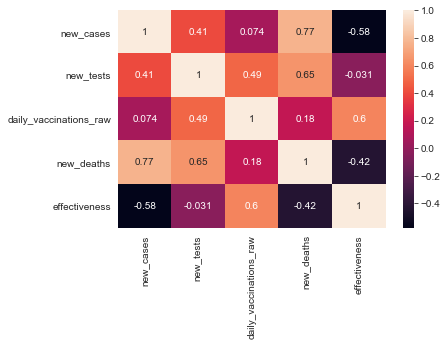

In [75]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [77]:
states = pd.read_csv('new_state_data.csv')
states.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16-01-2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
1,17-01-2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
2,18-01-2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
3,19-01-2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
4,20-01-2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0


In [78]:
states.groupby('State').sum()

,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
State,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,1.132899e+07,421590.0,3391.0,9.924497e+06,1404489.0,5525173.0,4679222.0,833.0,0.0,1.129601e+07,0.0,212.0,2014683.0,5234554.0,2696998.0,9.942734e+06
Andhra Pradesh,9.121768e+08,47380173.0,308699.0,7.144311e+08,197745658.0,368956824.0,384371948.0,105485.0,155998977.0,7.533635e+08,230688.0,35334.0,148205485.0,342124710.0,241617471.0,7.160343e+08
Arunachal Pradesh,3.391547e+07,1911436.0,19488.0,2.712398e+07,6791492.0,15690340.0,12546790.0,10122.0,1820.0,3.377869e+07,0.0,29693.0,11489674.0,11219008.0,4468580.0,2.720782e+07
Assam,3.834303e+08,24433559.0,169037.0,3.109564e+08,72473895.0,177301094.0,149094370.0,47937.0,68953907.0,3.139260e+08,1317.0,18921.0,100508019.0,139567832.0,77136275.0,3.115107e+08
Bihar,9.818519e+08,78242468.0,319963.0,8.281081e+08,153743794.0,457334240.0,399979888.0,149622.0,77972516.0,9.020493e+08,5114.0,20422.0,227218424.0,283446744.0,321602879.0,8.300049e+08
Chandigarh,3.102322e+07,1414400.0,7857.0,2.499616e+07,6027064.0,14959749.0,11145458.0,2878.0,20089.0,3.096927e+07,0.0,11540.0,8220460.0,9912532.0,7268211.0,2.503250e+07
Chhattisgarh,6.149884e+08,76280841.0,350070.0,5.158810e+08,99107404.0,261703202.0,274134666.0,56297.0,20137520.0,5.936969e+08,3131.0,60357.0,69179948.0,274437633.0,176202916.0,5.171143e+08
Dadra and Nagar Haveli and Daman and Diu,1.826012e+07,1505220.0,8928.0,1.598855e+07,2271575.0,10446644.0,6055162.0,2499.0,216.0,1.824432e+07,0.0,9716.0,8658141.0,5178549.0,2145576.0,1.600918e+07
Delhi,4.840444e+08,15604415.0,98687.0,3.781172e+08,105927144.0,234880916.0,165735672.0,77476.0,139775575.0,3.434315e+08,57494.0,95583.0,134225914.0,150736576.0,102577661.0,3.788822e+08


In [79]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

In [90]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population"
hdiurl = "https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_Human_Development_Index"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
hdiresponse = requests.get(hdiurl)
print(response.status_code)
print(hdiresponse.status_code)

200
200


In [91]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
hdisoup = BeautifulSoup(hdiresponse.text, 'html.parser')
indiatable = soup.find('table',{'class':"wikitable"})
hditable = hdisoup.find('table', {'class':'wikitable'})

In [82]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

  Rank State or union territory Population National Share (%)  \
0    1            Uttar Pradesh  199812341                NaN   
1    2              Maharashtra  112374333                NaN   
2    3                    Bihar  104099452                NaN   
3    4              West Bengal   91276115                NaN   
4    5           Madhya Pradesh   72626809                NaN   

  Decadal growth(2001–2012)  Rural population Percent rural  Urban population  \
0                     20.2%         155317278           NaN          44495063   
1                     20.0%          61556074           NaN          50818259   
2                     25.4%          92341436           NaN          11758016   
3                     13.8%          62183113           NaN          29093002   
4                     16.3%          52557404           NaN          20069405   

  Percent urban                     Area[16]               Density[a]  \
0           NaN   240,928 km2 (93,023 sq mi)    8

In [93]:
hdi_df = pd.read_html(str(hditable))
hdi_df = pd.DataFrame(hdi_df[0])
hdi_df

,Rank,State/Union Territory,HDI (2019),Comparable country
,High human development,High human development,High human development,High human development
0,1,Kerala,0.782,Sri Lanka
1,2,Chandigarh,0.776,Armenia
2,3,Goa,0.763,China
3,4,Lakshadweep,0.751,Moldova
4,5,Delhi,0.746,Algeria
5,6,Andaman and Nicobar Islands,0.741,Dominica
6,7,Puducherry,0.740,Maldives
7,8,Himachal Pradesh,0.725,Tonga
8,9,Punjab,0.724,Libya


In [95]:
hdi_df.drop(14, inplace = True)
hdi_df

,Rank,State/Union Territory,HDI (2019),Comparable country
,High human development,High human development,High human development,High human development
0,1,Kerala,0.782,Sri Lanka
1,2,Chandigarh,0.776,Armenia
2,3,Goa,0.763,China
3,4,Lakshadweep,0.751,Moldova
4,5,Delhi,0.746,Algeria
5,6,Andaman and Nicobar Islands,0.741,Dominica
6,7,Puducherry,0.740,Maldives
7,8,Himachal Pradesh,0.725,Tonga
8,9,Punjab,0.724,Libya


In [96]:
hdi_df.columns

MultiIndex([(                 'Rank', 'High human development'),
            ('State/Union Territory', 'High human development'),
            (           'HDI (2019)', 'High human development'),
            (   'Comparable country', 'High human development')],
           )

In [97]:
hdi_df.columns = ['_'.join(col) for col in hdi_df.columns.values]

In [99]:
hdi_df.columns

Index(['Rank_High human development',
       'State/Union Territory_High human development',
       'HDI (2019)_High human development',
       'Comparable country_High human development'],
      dtype='object')

In [101]:
hdi_df.sort_values(by = 'State/Union Territory_High human development', inplace = True)
hdi_df.head()

,Rank_High human development,State/Union Territory_High human development,HDI (2019)_High human development,Comparable country_High human development
5,6,Andaman and Nicobar Islands,0.741,Dominica
27,27,Andhra Pradesh,0.649,Namibia
24,24,Arunachal Pradesh,0.661,Nicaragua
31,30,Assam,0.613,Laos
37,36,Bihar,0.574,Republic of the Congo


In [103]:
hdi_df.drop(['Rank_High human development', 'Comparable country_High human development'], axis = 1, inplace = True)

In [108]:
hdi_df.head()

,State/Union Territory_High human development,HDI (2019)_High human development
0,Andaman and Nicobar Islands,0.741
1,Andhra Pradesh,0.649
2,Arunachal Pradesh,0.661
3,Assam,0.613
4,Bihar,0.574


In [105]:
hdi_df.reset_index(inplace = True)

In [107]:
hdi_df.drop('index', axis = 1, inplace = True)

In [118]:
hdi_df

,State/Union Territory_High human development,HDI (2019)_High human development
0,Andaman and Nicobar Islands,0.741
1,Andhra Pradesh,0.649
2,Arunachal Pradesh,0.661
3,Assam,0.613
4,Bihar,0.574
5,Chandigarh,0.776
6,Chhattisgarh,0.611
7,Dadra and Nagar Haveli,0.663
8,Daman and Diu,0.708
9,Delhi,0.746


In [85]:
df = df.sort_values(by = 'State or union territory')
df

,Rank,State or union territory,Population,National Share (%),Decadal growth(2001–2012),Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio
33,UT6,Andaman and Nicobar Islands,380581,NaN,6.9%,237093,NaN,143488,NaN,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
9,10,Andhra Pradesh,"49,577,103[b]",NaN,11.0%,34966693,NaN,14610410,NaN,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
27,26,Arunachal Pradesh,1383727,NaN,26.0%,1066358,NaN,317369,NaN,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938
14,15,Assam,31205576,2.58%,17.7%,26807034,85.90%,4398542,14.10%,"78,438 km2 (30,285 sq mi)","398/km2 (1,030/sq mi)",958
2,3,Bihar,104099452,NaN,25.4%,92341436,NaN,11758016,NaN,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
30,UT4,Chandigarh,1055450,NaN,17.2%,28991,NaN,1026459,NaN,114 km2 (44 sq mi),"9,252/km2 (23,960/sq mi)",818
16,17,Chhattisgarh,25545198,NaN,22.6%,19607961,NaN,5937237,NaN,"135,191 km2 (52,198 sq mi)",189/km2 (490/sq mi),991
32,UT5,Dadra and Nagar Haveli and Daman and Diu,585764,NaN,55.1%,243510,NaN,342254,NaN,603 km2 (233 sq mi),"970/km2 (2,500/sq mi)",711
26,25,Goa,1458545,NaN,8.2%,551731,NaN,906814,NaN,"3,702 km2 (1,429 sq mi)","394/km2 (1,020/sq mi)",973
8,9,Gujarat,60439692,NaN,19.3%,34694609,NaN,25745083,NaN,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919


In [109]:
df.drop(['Population', 'Decadal growth(2001–2012)', 'Percent rural', 'Percent urban', 'National Share (%)', 'Area[16]', 'Rank'], axis = 1, inplace = True)

In [114]:
df.head()

,State or union territory,Rural population,Urban population,Density[a],Sex ratio
0,Andaman and Nicobar Islands,237093,143488,46/km2 (120/sq mi),876
1,Andhra Pradesh,34966693,14610410,303/km2 (780/sq mi),993
2,Arunachal Pradesh,1066358,317369,17/km2 (44/sq mi),938
3,Assam,26807034,4398542,"398/km2 (1,030/sq mi)",958
4,Bihar,92341436,11758016,"1,102/km2 (2,850/sq mi)",918


In [111]:
df.reset_index(inplace = True)

In [113]:
df.drop('index', axis = 1, inplace = True)

In [115]:
df['% Rural'] = 100 * df['Rural population'] / (df['Rural population'] + df['Urban population'])

In [116]:
df.head()

,State or union territory,Rural population,Urban population,Density[a],Sex ratio,% Rural
0,Andaman and Nicobar Islands,237093,143488,46/km2 (120/sq mi),876,62.297645
1,Andhra Pradesh,34966693,14610410,303/km2 (780/sq mi),993,70.529924
2,Arunachal Pradesh,1066358,317369,17/km2 (44/sq mi),938,77.064190
3,Assam,26807034,4398542,"398/km2 (1,030/sq mi)",958,85.904628
4,Bihar,92341436,11758016,"1,102/km2 (2,850/sq mi)",918,88.705016


In [117]:
df

,State or union territory,Rural population,Urban population,Density[a],Sex ratio,% Rural
0,Andaman and Nicobar Islands,237093,143488,46/km2 (120/sq mi),876,62.297645
1,Andhra Pradesh,34966693,14610410,303/km2 (780/sq mi),993,70.529924
2,Arunachal Pradesh,1066358,317369,17/km2 (44/sq mi),938,77.064190
3,Assam,26807034,4398542,"398/km2 (1,030/sq mi)",958,85.904628
4,Bihar,92341436,11758016,"1,102/km2 (2,850/sq mi)",918,88.705016
5,Chandigarh,28991,1026459,"9,252/km2 (23,960/sq mi)",818,2.746790
6,Chhattisgarh,19607961,5937237,189/km2 (490/sq mi),991,76.757914
7,Dadra and Nagar Haveli and Daman and Diu,243510,342254,"970/km2 (2,500/sq mi)",711,41.571350
8,Goa,551731,906814,"394/km2 (1,020/sq mi)",973,37.827492
9,Gujarat,34694609,25745083,308/km2 (800/sq mi),919,57.403683
